In [145]:
import pandas as pd

In [146]:
claimant_df = pd.read_csv('claimants.csv')

In [147]:
claimant_df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [148]:
claimant_df.shape

(1340, 7)

In [149]:
claimant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [150]:
claimant_df.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [151]:
claimant_df.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [152]:
claimant_df['CLMSEX'] = claimant_df['CLMSEX'].fillna(1)

In [153]:
claimant_df.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [154]:
claimant_df['CLMINSUR'] = claimant_df['CLMINSUR'].fillna(1)

In [155]:
claimant_df.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [156]:
claimant_df['SEATBELT'] = claimant_df['SEATBELT'].fillna(1)

In [157]:
claimant_df.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [158]:
# here we include CLMAGE mean inside the fillna coz the age got vary by adding each age into the dataset  
# so I'm handing over the work to the
claimant_df['CLMAGE'] = claimant_df['CLMAGE'].fillna(claimant_df['CLMAGE'].mean())

In [159]:
claimant_df.isna().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [160]:
x = claimant_df.drop(labels = ['ATTORNEY','CASENUM'],axis = 1)

In [161]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [162]:
y = claimant_df['ATTORNEY']

In [163]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [176]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [178]:
model = DecisionTreeClassifier()

In [179]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [180]:
y_train_pred = model.predict(x_train)

In [181]:
accuracy_score(y_train,y_train_pred )

0.9970149253731343

In [182]:
y_test_pred = model.predict(x_pred)

In [183]:
accuracy_score(y_pred,y_test_pred )

0.9164179104477612

In [184]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

[Text(0.479052554197417, 0.9772727272727273, 'x[4] <= 0.988\ngini = 0.5\nsamples = 1005\nvalue = [515, 490]'),
 Text(0.16884801660516605, 0.9318181818181818, 'x[3] <= 4.5\ngini = 0.398\nsamples = 471\nvalue = [129, 342]'),
 Text(0.3239502854012915, 0.9545454545454546, 'True  '),
 Text(0.02952029520295203, 0.8863636363636364, 'x[4] <= 0.183\ngini = 0.498\nsamples = 53\nvalue = [28, 25]'),
 Text(0.01107011070110701, 0.8409090909090909, 'x[2] <= 0.5\ngini = 0.436\nsamples = 28\nvalue = [9, 19]'),
 Text(0.007380073800738007, 0.7954545454545454, 'x[4] <= 0.009\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'),
 Text(0.0036900369003690036, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.01107011070110701, 0.75, 'x[4] <= 0.015\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.007380073800738007, 0.7045454545454546, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.014760147601476014, 0.7045454545454546, 'x[3] <= 0.5\ngini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(0.007380

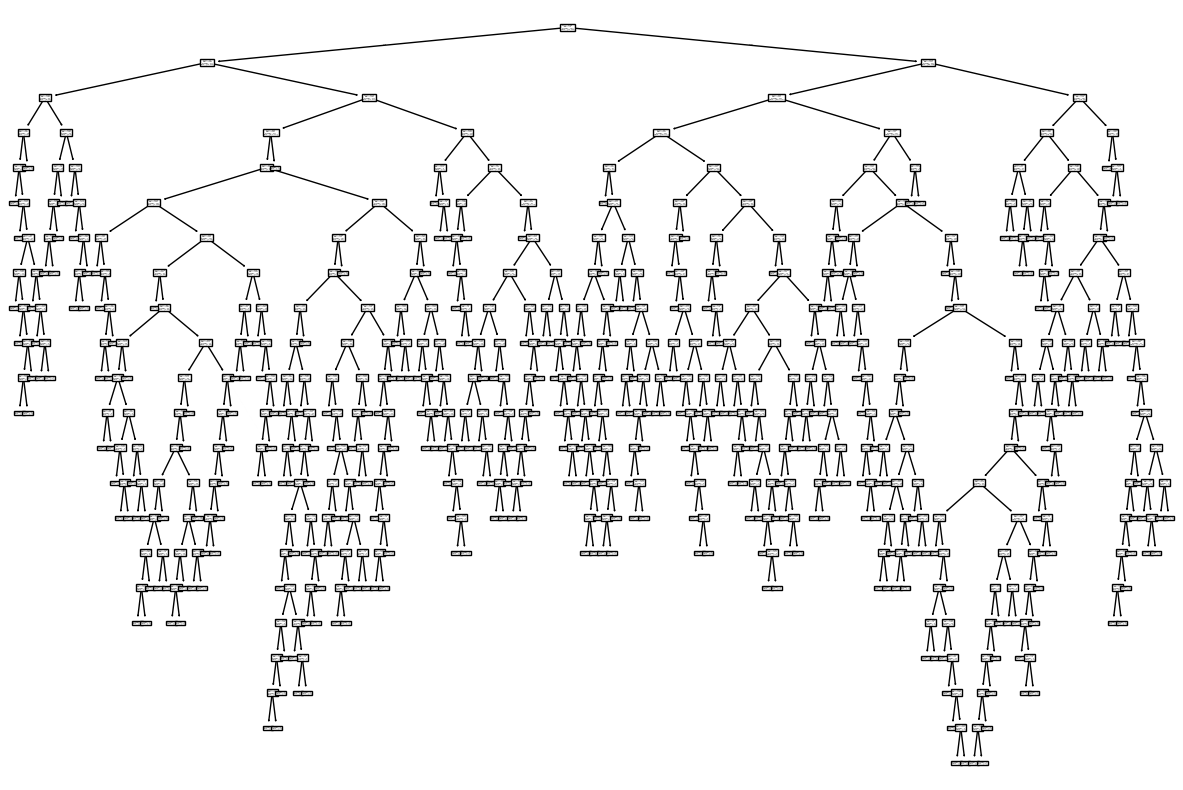

In [185]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree = model)
           

In [186]:
# creating model with hyperparameter

model_1 = DecisionTreeClassifier(max_depth = 6)

In [187]:
model_1.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [188]:
y_train_pred = model_1.predict(x_train)

In [189]:
accuracy_score(y_train,y_train_pred )

0.7741293532338308

In [190]:
y_test_pred = model_1.predict(x_pred)

In [191]:
accuracy_score(y_pred,y_test_pred )

0.7582089552238805

[Text(0.497626582278481, 0.9285714285714286, 'x[4] <= 0.988\ngini = 0.5\nsamples = 1005\nvalue = [515, 490]'),
 Text(0.22626582278481014, 0.7857142857142857, 'x[3] <= 4.5\ngini = 0.398\nsamples = 471\nvalue = [129, 342]'),
 Text(0.36194620253164556, 0.8571428571428572, 'True  '),
 Text(0.11392405063291139, 0.6428571428571429, 'x[4] <= 0.183\ngini = 0.498\nsamples = 53\nvalue = [28, 25]'),
 Text(0.06329113924050633, 0.5, 'x[2] <= 0.5\ngini = 0.436\nsamples = 28\nvalue = [9, 19]'),
 Text(0.05063291139240506, 0.35714285714285715, 'x[3] <= 0.5\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'),
 Text(0.02531645569620253, 0.21428571428571427, 'x[4] <= 0.015\ngini = 0.346\nsamples = 18\nvalue = [4, 14]'),
 Text(0.012658227848101266, 0.07142857142857142, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.0379746835443038, 0.07142857142857142, 'gini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.0759493670886076, 0.21428571428571427, 'x[4] <= 0.018\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),

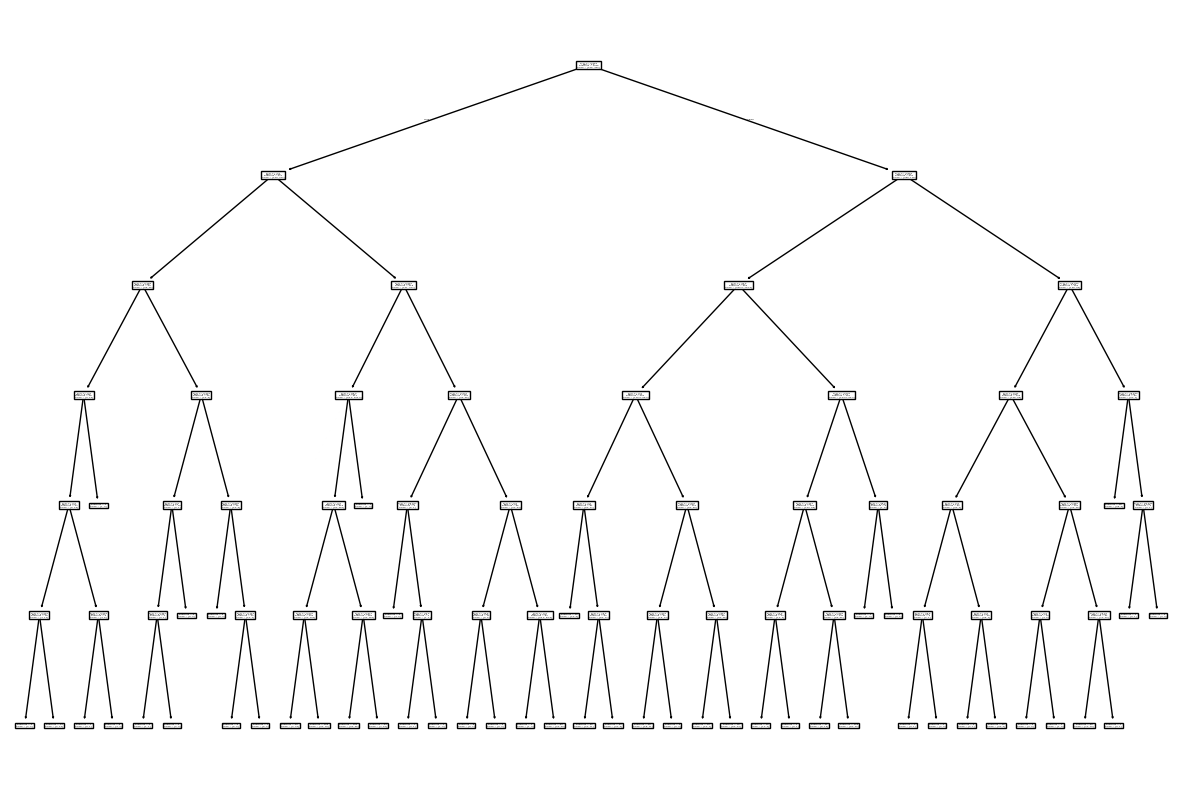

In [192]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree = model_1)
           

# day 06

In [193]:
from sklearn.model_selection import GridSearchCV

In [254]:
grid = GridSearchCV(estimator = model,param_grid = {'criterion':["gini", "entropy", "log_loss"],'max_depth':[1,2,3,4,5,6,7,8,9,10]},cv = 5)

In [195]:
grid.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [196]:
print(grid.best_score_)

0.7243781094527364


In [197]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
model_2 = RandomForestClassifier(n_estimators = 200,max_depth = 5)

In [249]:
model_2.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [250]:
y_train_pred_1 = model_2.predict(x_train)

In [251]:
accuracy_score(y_train,y_train_pred_1)

0.7442786069651741

In [252]:
y_test_pred_2 = model_2.predict(x_test)

In [253]:
accuracy_score(y_test,y_test_pred_2)

0.7402985074626866